# Results and visualizations
**By Viktor Due Pedersen(vipe) and Aske Schytt Meineche (askm)**

## Imports

In [1]:
import plotting_tools as pt

# Select model experiments
month_dir = "model_outputs/months/"
satellite_dir = "model_outputs/satellites/"
band_dir = 'model_outputs/bands_medium/'

## See training / Validation curve

{'num_input_channels': 15, 'conv_filters1': 4, 'conv_filters2': 8, 'conv_filters3': 4, 'num_dpoints': 6000, 'exclude_layer': None, 'exclude_layer_name': 'No Layer Excluded', 'num_epochs': 10}


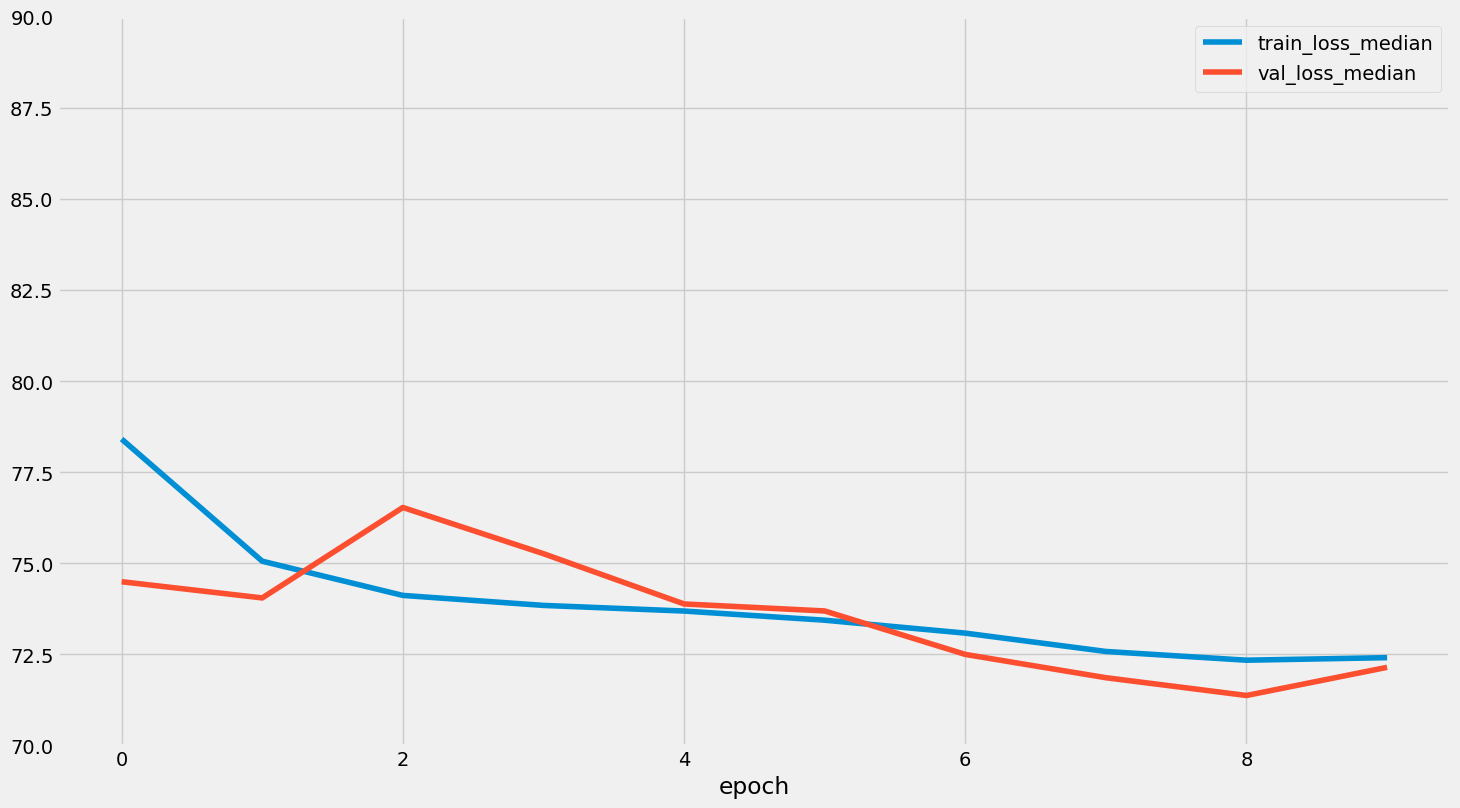

In [2]:
pt.plot_best_config(satellite_dir)

## Performance on months when training on global dataset 

EVALUATING MODEL ON Sept


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.02it/s]
100it [00:00, 265.09it/s]


EVALUATING MODEL ON Oct


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.31it/s]
100it [00:00, 272.28it/s]


EVALUATING MODEL ON Nov


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.61it/s]
100it [00:00, 279.74it/s]


EVALUATING MODEL ON Dec


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.07it/s]
100it [00:00, 293.52it/s]


EVALUATING MODEL ON Jan


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.20it/s]
100it [00:00, 274.70it/s]


EVALUATING MODEL ON Feb


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.73it/s]
100it [00:00, 257.93it/s]


EVALUATING MODEL ON March


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.30it/s]
100it [00:00, 291.83it/s]


EVALUATING MODEL ON April


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.67it/s]
100it [00:00, 232.23it/s]


EVALUATING MODEL ON May


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.98it/s]
100it [00:00, 267.00it/s]


EVALUATING MODEL ON June


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.98it/s]
100it [00:00, 267.60it/s]


EVALUATING MODEL ON July


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.63it/s]
100it [00:00, 283.69it/s]


EVALUATING MODEL ON Aug


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.54it/s]
100it [00:00, 283.91it/s]


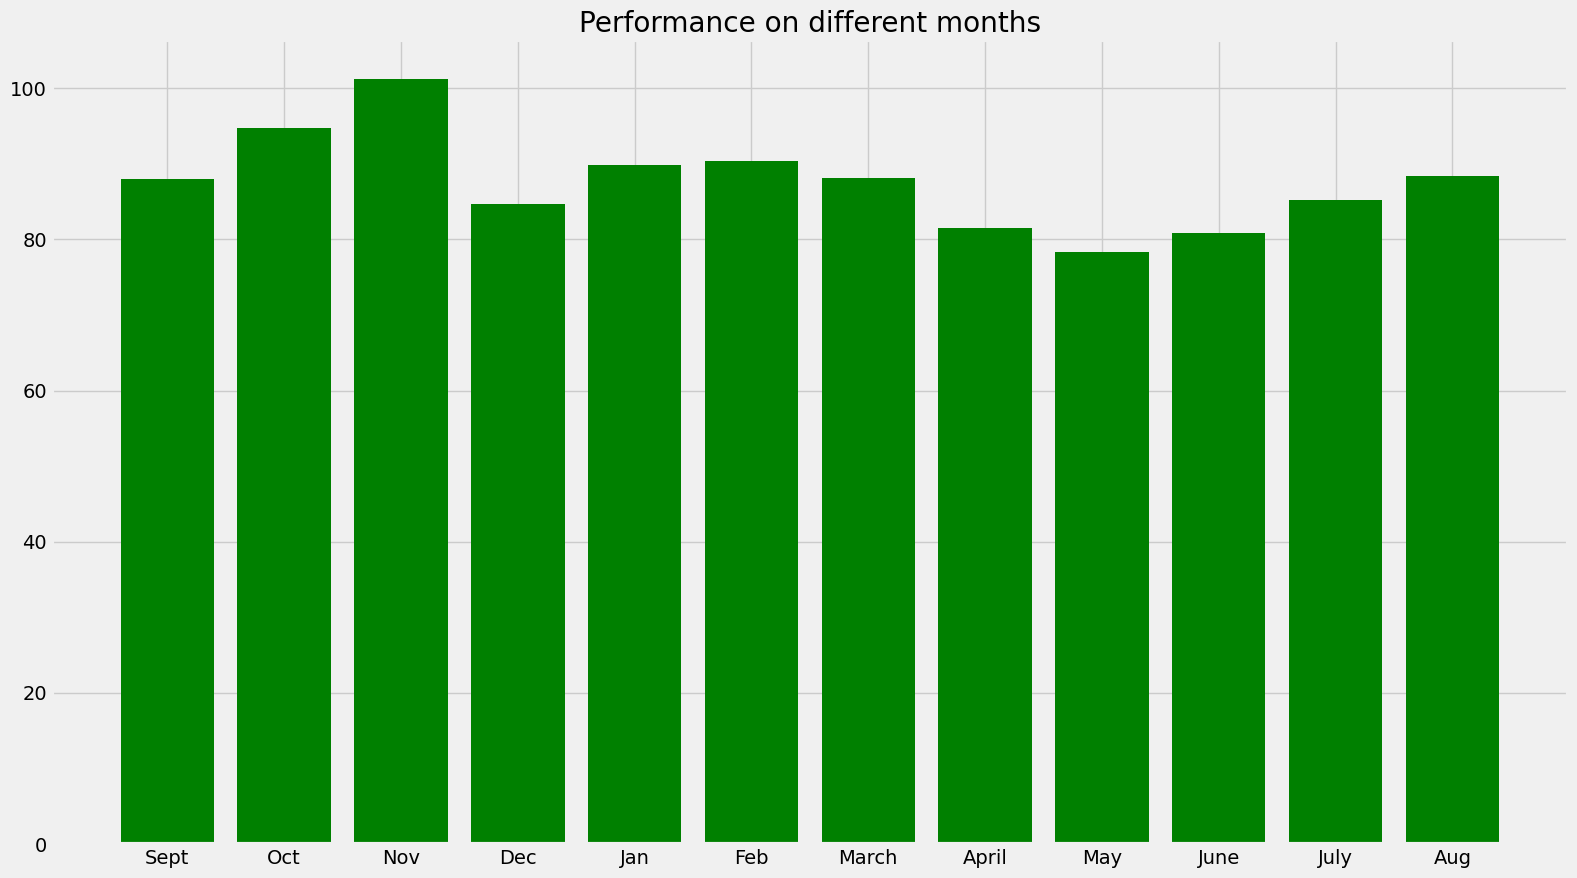

In [3]:
# create subsets
pt.create_monthly_datasets()

# load model
model = pt.get_model_from_path(satellite_dir)
# model.eval()

pt.evaluate_monthly(model)

## Performance on months when training monthly

EVALUATING MODEL ON Sept


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 42.16it/s]
100it [00:00, 276.11it/s]


EVALUATING MODEL ON Oct


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 41.17it/s]
100it [00:00, 275.59it/s]


EVALUATING MODEL ON Nov


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.11it/s]
100it [00:00, 213.42it/s]


EVALUATING MODEL ON Dec


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.42it/s]
100it [00:00, 239.93it/s]


EVALUATING MODEL ON Jan


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.43it/s]
100it [00:00, 198.60it/s]


EVALUATING MODEL ON Feb


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.91it/s]
100it [00:00, 233.36it/s]


EVALUATING MODEL ON March


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 33.16it/s]
100it [00:00, 171.71it/s]


EVALUATING MODEL ON April


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.11it/s]
100it [00:00, 203.72it/s]


EVALUATING MODEL ON May


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 40.63it/s]
100it [00:00, 235.91it/s]


EVALUATING MODEL ON June


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.83it/s]
100it [00:00, 253.07it/s]


EVALUATING MODEL ON July


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.36it/s]
100it [00:00, 235.18it/s]


EVALUATING MODEL ON Aug


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.88it/s]
100it [00:00, 267.38it/s]


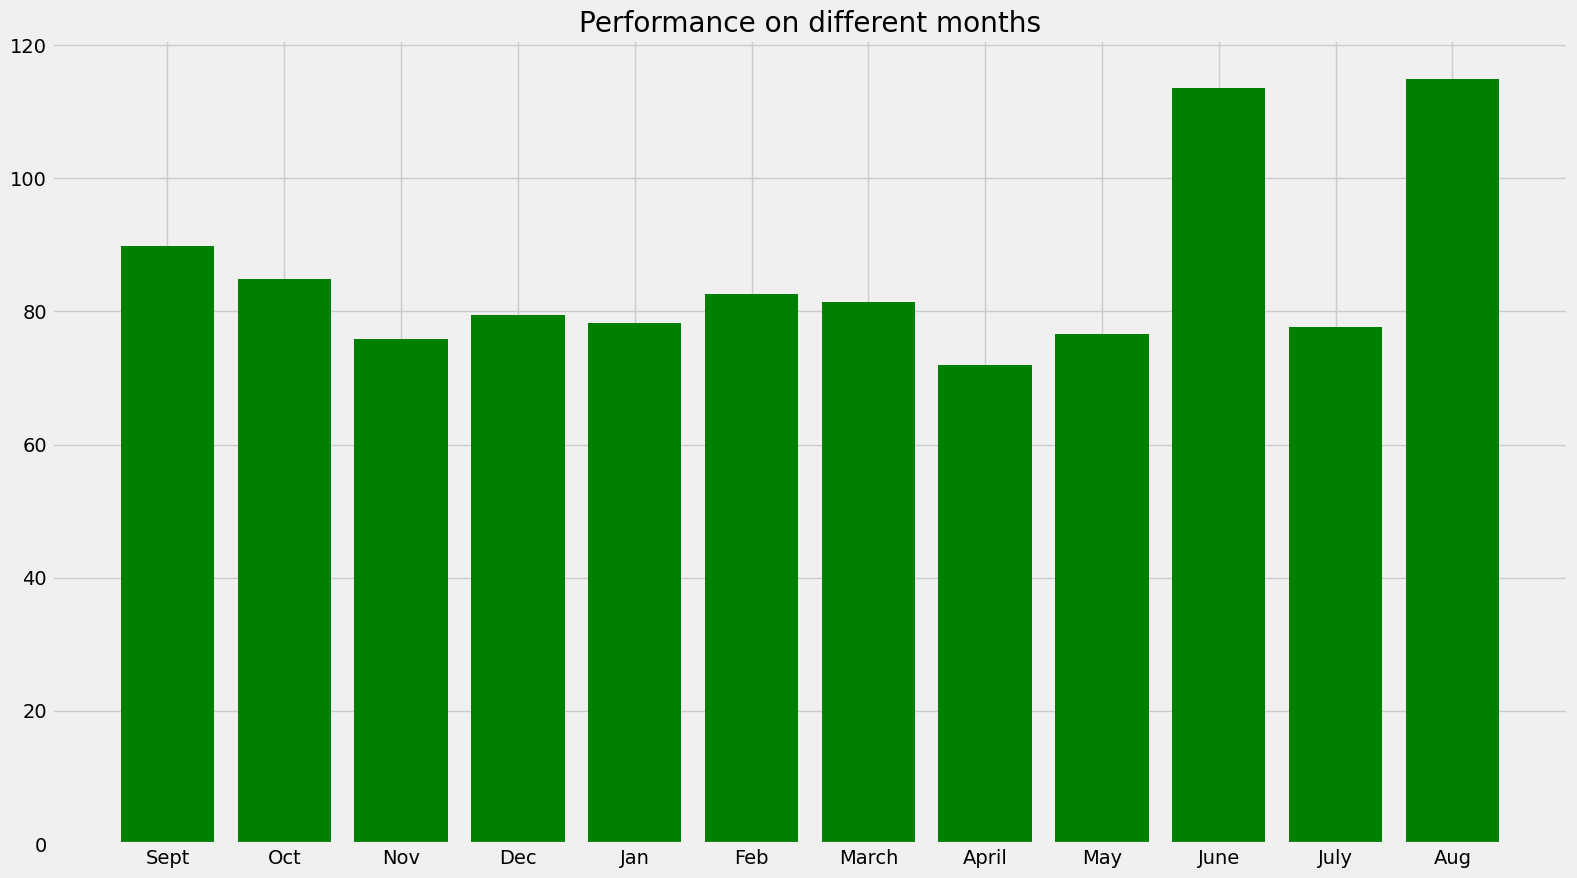

In [4]:
models = pt.get_best_model_pr_month(month_dir)
pt.evaluate_monthly_multiple(models)

## Performance on single datapoints on worst month vs best month

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 32.62it/s]
0it [00:00, ?it/s]


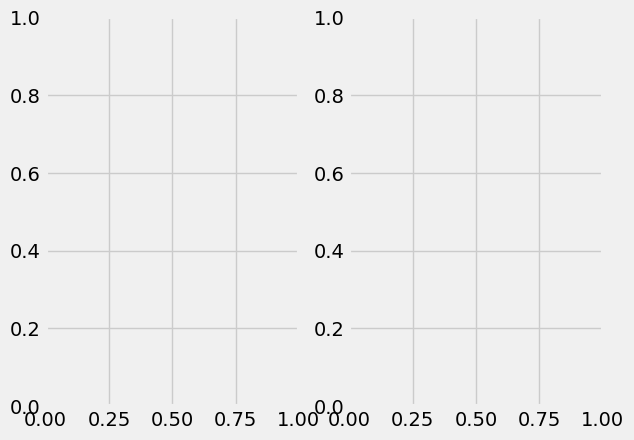

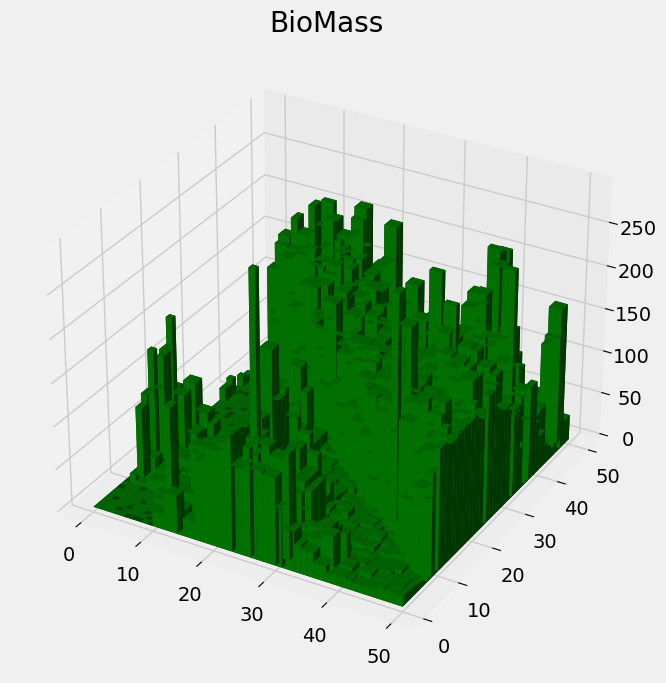

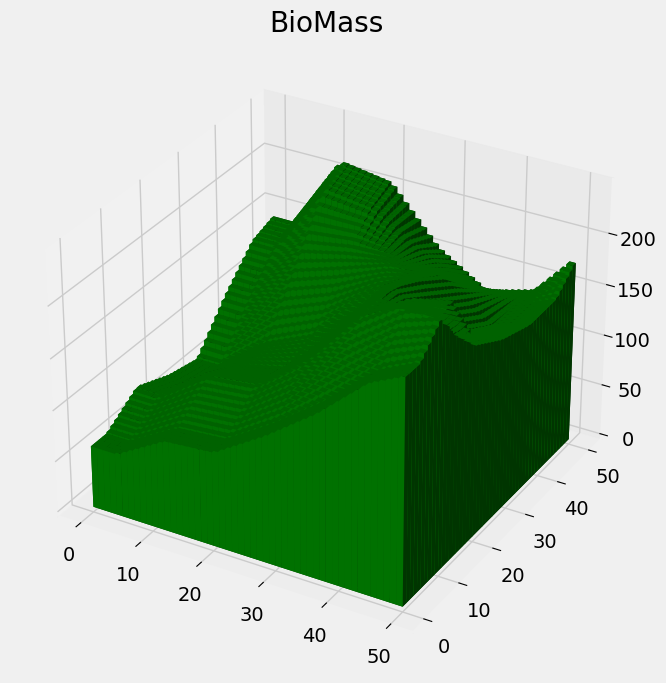

ERROR 106.77132


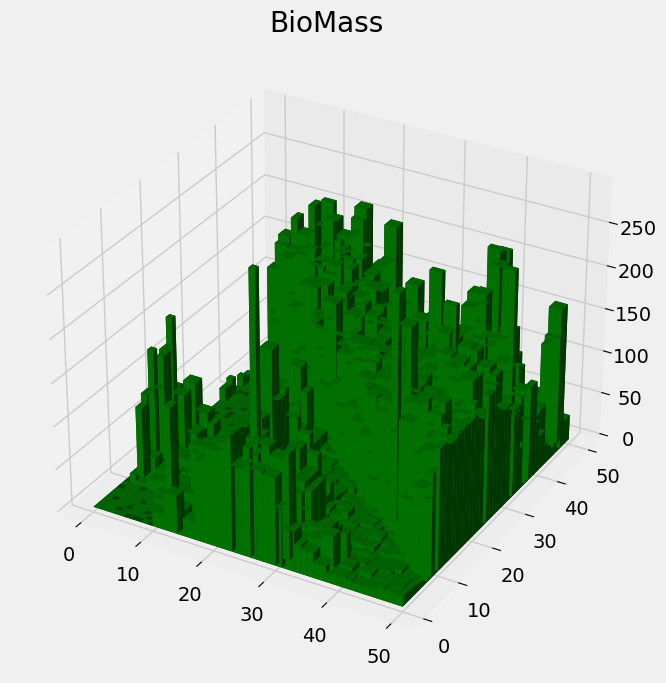

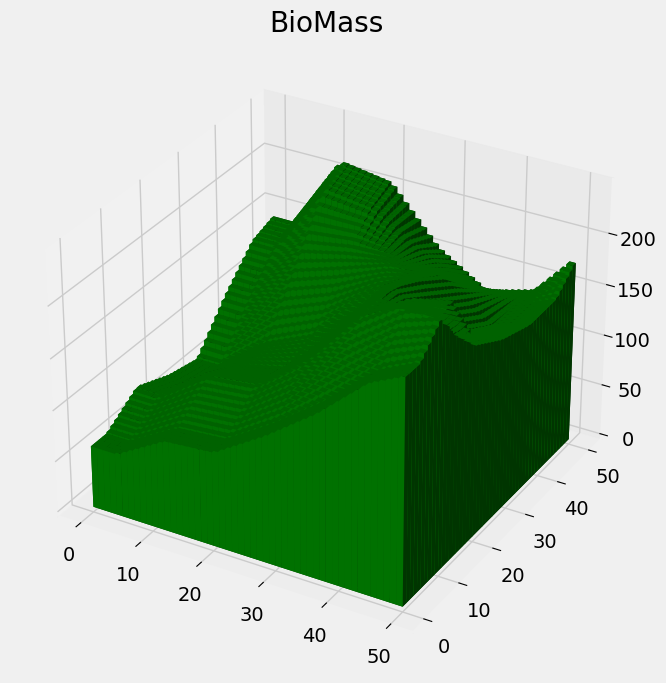

In [5]:
month ='Nov'

chip_id,fpath,df = pt.get_subset_from_month(month)
pt.plot_agbm(chip_id=chip_id,fpath=fpath,df=df,model=model)

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 33.05it/s]
0it [00:00, ?it/s]


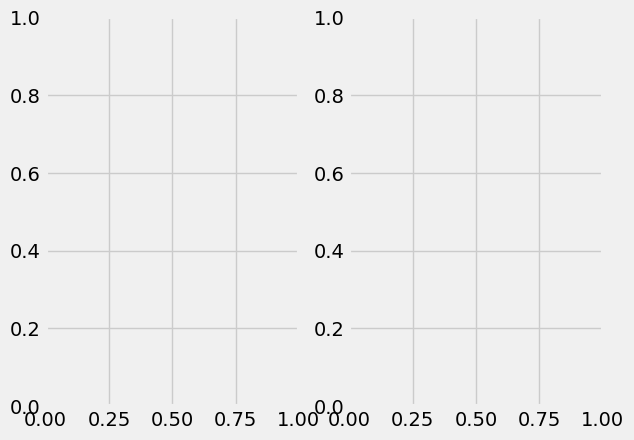

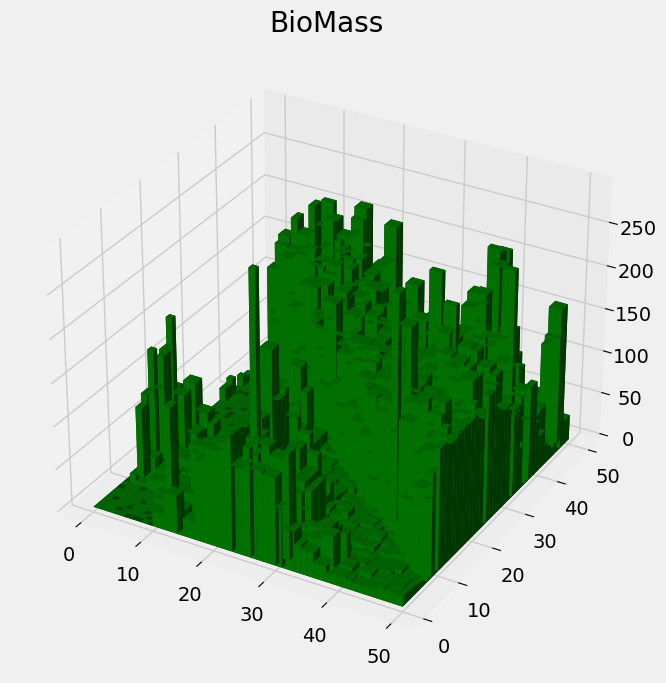

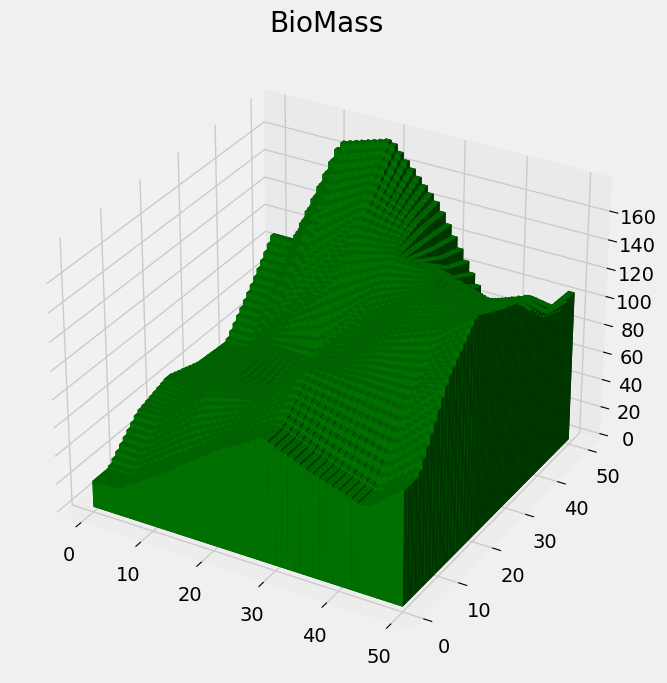

ERROR 62.54483


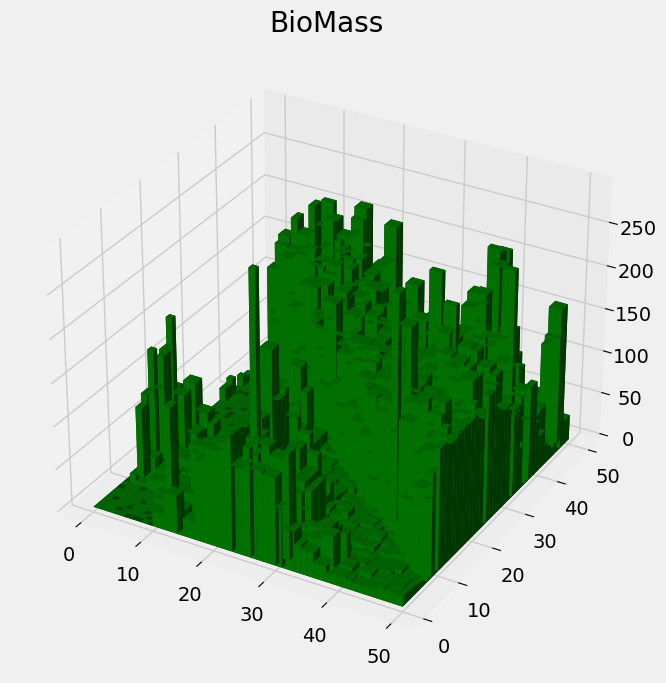

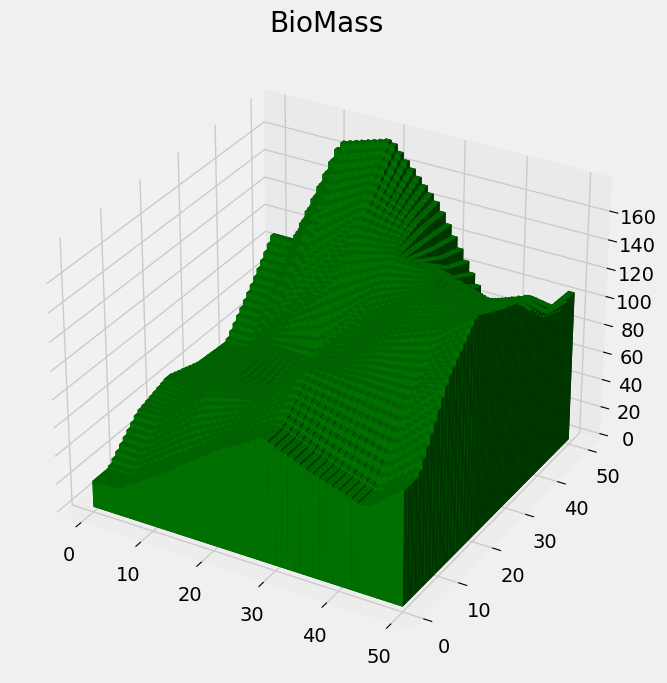

In [6]:
month ='May'

chip_id,fpath,df = pt.get_subset_from_month(month)
pt.plot_agbm(chip_id=chip_id,fpath=fpath,df=df,model=model)

## Ablation Study on Satellites

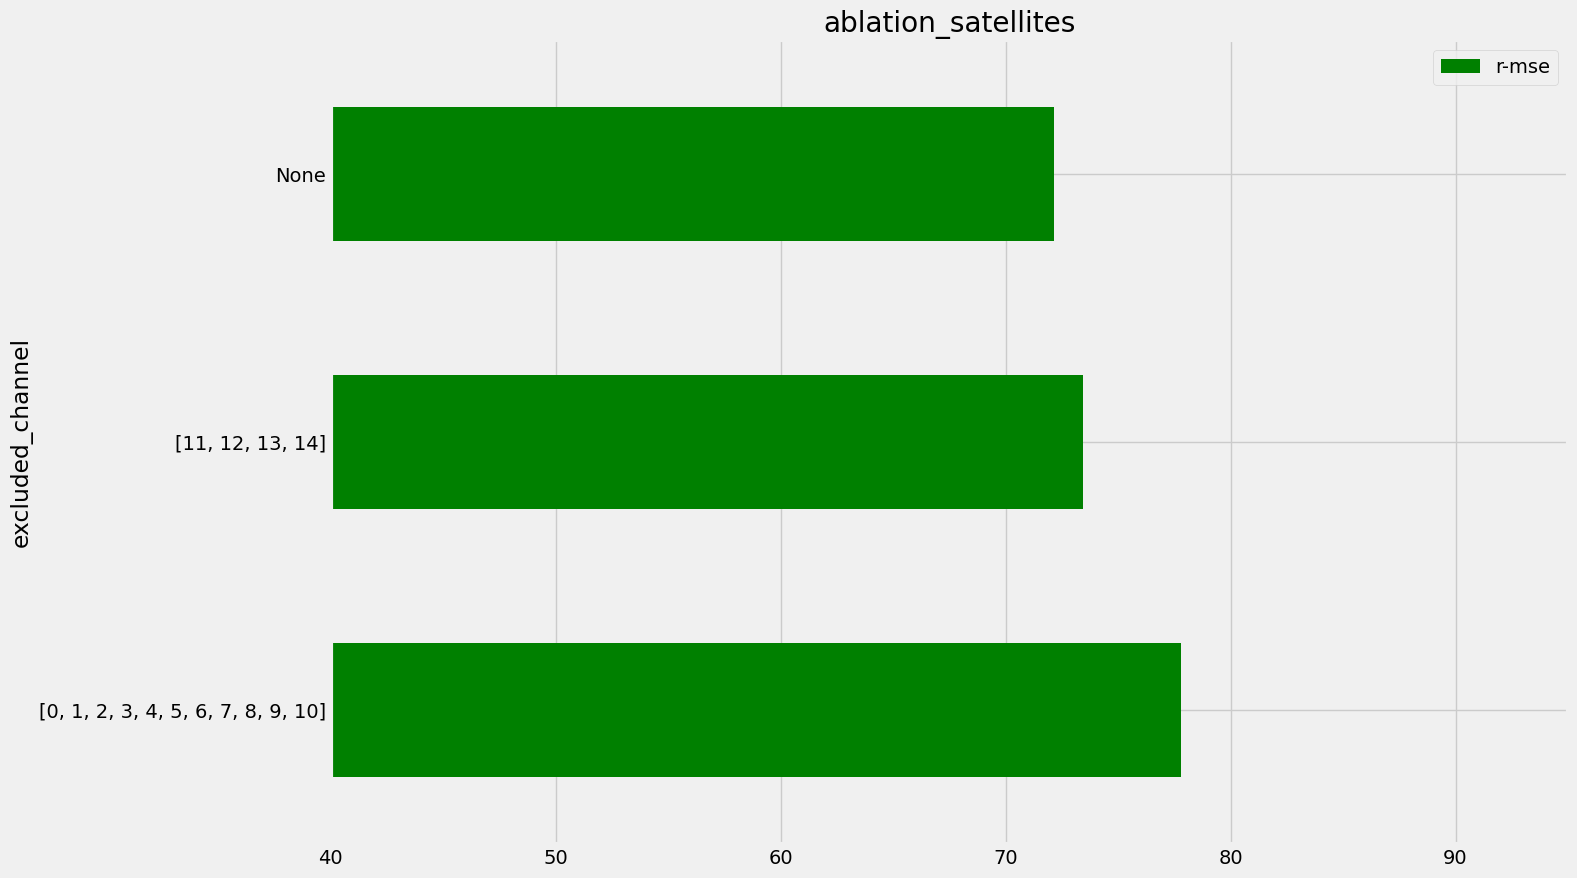

In [7]:
conf = pt.plot_ablation(satellite_dir, metric="val_loss_median", id_="exclude_layer", title="ablation_satellites")

## Ablation study on bands

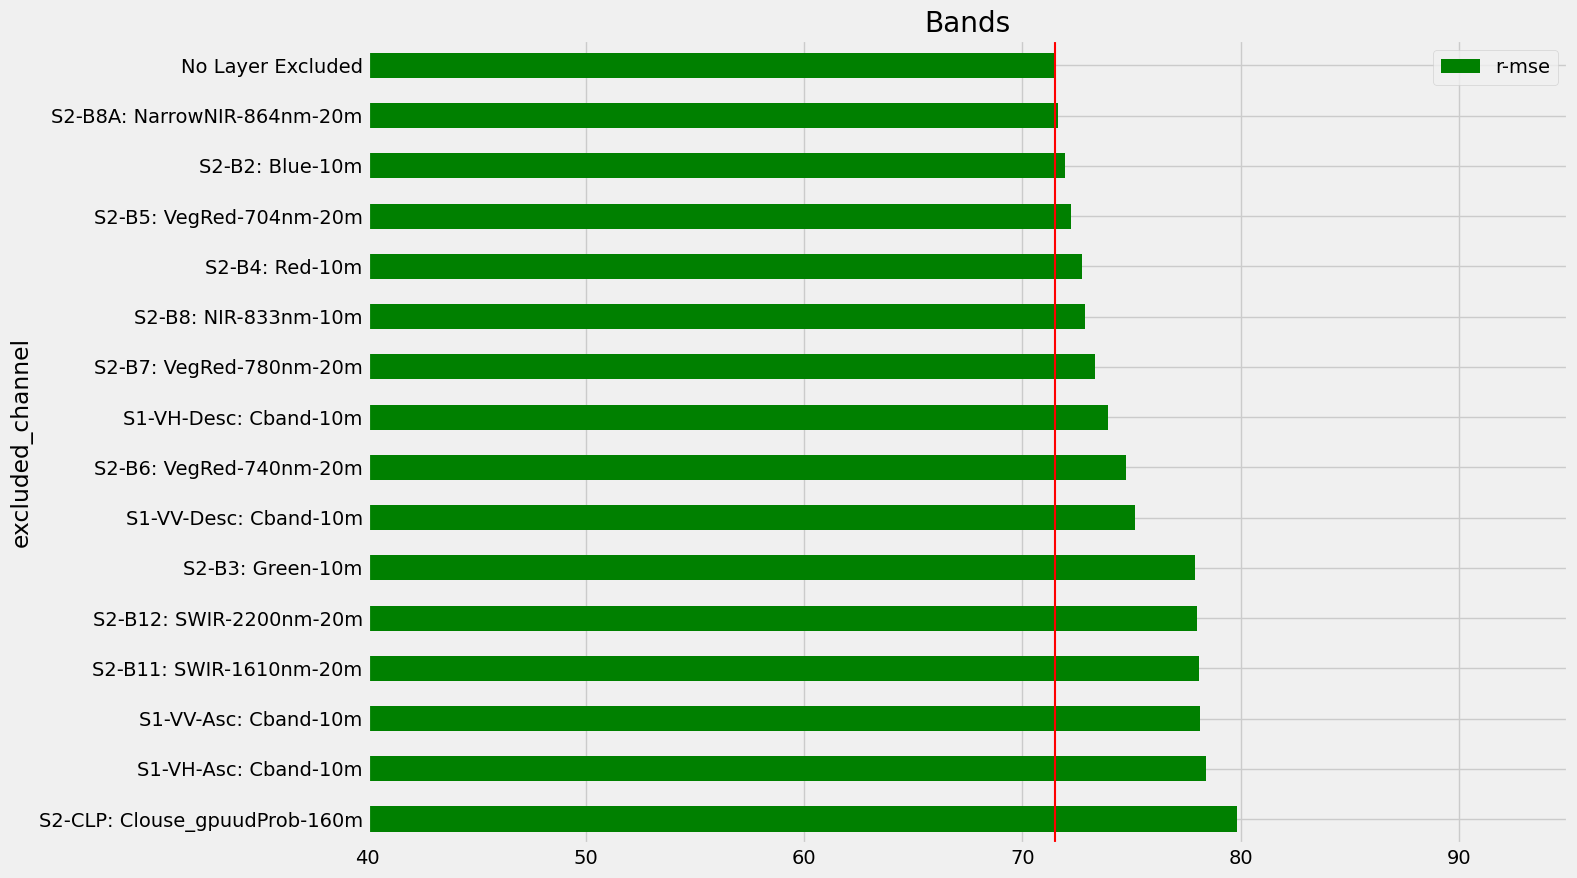

In [8]:
conf = pt.plot_ablation(band_dir, metric="val_loss_median", id_="exclude_layer_name", title="Bands",vline='No Layer Excluded')